### Import modules

In [79]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil
import numpy as np
import xtrack as xt
import matplotlib 
import numpy as np
import PyNAFF as pnf
import matplotlib.pyplot as plt

# Local imports
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import analysis_functions 

# Apply better style
sns.set_theme(style="whitegrid")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
#sns.set(font='Adobe Devanagari')
sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 0.5, "grid.linewidth": 0.3})


matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
# Not italized latex
matplotlib.rcParams['mathtext.default'] = 'regular'
matplotlib.rcParams["font.weight"] = "light"

%config InlineBackend.figure_format='svg'



### Collider 2023, 0.5/0.5, 62.313/60.320

In [80]:
# Define study
STUDY_NAME = "tune_scan_2023"
COLLIDER = "collider_00"
JOB = "xtrack_0215"
TITLE_STUDY = 'run III 2023'
INITIAL_TUNE = (0.313, 0.320)
INITIAL_BETA = (0.48, 0.48)
COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/{JOB}/collider.json"


In [81]:
# Load collider
collider = xt.Multiline.from_json(COLLIDER_PATH)
collider.build_trackers()

Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Compiling ContextCpu kernels...


611c84924763454cacd9522814e8b25a.c:4389: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from 611c84924763454cacd9522814e8b25a.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


944e80cf7e3d4fe5acd399402c20acf2.c:4389: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from 944e80cf7e3d4fe5acd399402c20acf2.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


In [82]:
# Compute footprint
fp = collider["lhcb1"].get_footprint(
    nemitt_x=2.2e-6,
    nemitt_y=2.2e-6,
    n_turns=2000,
    #linear_rescale_on_knobs=[xt.LinearRescale(knob_name="beambeam_scale", v0=0.0, dv=0.1)],
    freeze_longitudinal=True,
)

Compiling ContextCpu kernels...


ae8a0088413d4f61868e991ab327afe4.c:4394: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from ae8a0088413d4f61868e991ab327afe4.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 


Done compiling ContextCpu kernels.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.


In [83]:
# Postprocess footprint
signal = fp.mon.x[-10,:]
signal = fp.mon.y[-10,:]
qx_pynaff = []
qy_pynaff = []
(my_len,_) = np.shape(fp.mon.x)
for ii in range(my_len):   
    signal = fp.mon.x[ii,:]
    qx_pynaff.append(pnf.naff(signal, fp.n_turns, 1, 0 , False)[0][1])
    signal = fp.mon.y[ii,:]
    qy_pynaff.append(pnf.naff(signal, fp.n_turns, 1, 0 , False)[0][1])

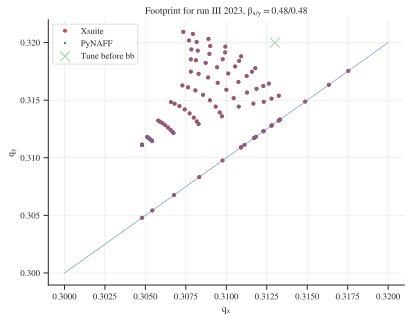

In [84]:
# Plot footprint
fp.plot(color='r',linewidth=0, marker='o', markersize=3, label='Xsuite')
plt.plot(qx_pynaff, qy_pynaff,'.',color='b', markersize=3, label='PyNAFF')
plt.plot([.3,.32],[.3,.32],'-')
plt.scatter(INITIAL_TUNE[0], INITIAL_TUNE[1], marker='x', color='g', s=100, label='Tune before bb')
plt.title(f'Footprint for {TITLE_STUDY}, ' + r'$\beta_{x/y} =$' + f'{INITIAL_BETA[0]}/{INITIAL_BETA[1]}')
plt.legend()
plt.grid()
plt.show()

### Collider 2023, 0.2/0.2, 62.313/60.318

Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Compiling ContextCpu kernels...


fe19eccbeebe40529d3f94cc236e50c5.c:4389: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from fe19eccbeebe40529d3f94cc236e50c5.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


40175eda26214263858cf16dc192d654.c:4389: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from 40175eda26214263858cf16dc192d654.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


69e69ad7657e4efc835f2fe945b0f1cd.c:4394: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from 69e69ad7657e4efc835f2fe945b0f1cd.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 


Done compiling ContextCpu kernels.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.


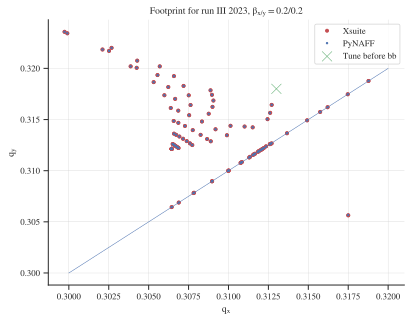

In [85]:
# Define study
STUDY_NAME = "tune_scan_2023"
COLLIDER = "collider_01"
JOB = "xtrack_0188"
TITLE_STUDY = 'run III 2023'
INITIAL_TUNE = (0.313, 0.318)
INITIAL_BETA = (0.2, 0.2)
COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/{JOB}/collider.json"


# Load collider
collider = xt.Multiline.from_json(COLLIDER_PATH)
collider.build_trackers()

# Compute footprint
fp = collider["lhcb1"].get_footprint(
    nemitt_x=2.2e-6,
    nemitt_y=2.2e-6,
    n_turns=2000,
    #linear_rescale_on_knobs=[xt.LinearRescale(knob_name="beambeam_scale", v0=0.0, dv=0.1)],
    freeze_longitudinal=True,
)

# Postprocess footprint
signal = fp.mon.x[-10,:]
signal = fp.mon.y[-10,:]
qx_pynaff = []
qy_pynaff = []
(my_len,_) = np.shape(fp.mon.x)
for ii in range(my_len):   
    signal = fp.mon.x[ii,:]
    qx_pynaff.append(pnf.naff(signal, fp.n_turns, 1, 0 , False)[0][1])
    signal = fp.mon.y[ii,:]
    qy_pynaff.append(pnf.naff(signal, fp.n_turns, 1, 0 , False)[0][1])
    
# Plot footprint
fp.plot(color='r',linewidth=0, marker='o', markersize=3, label='Xsuite')
plt.plot(qx_pynaff, qy_pynaff,'.',color='b', markersize=3, label='PyNAFF')
plt.plot([.3,.32],[.3,.32],'-')
plt.scatter(INITIAL_TUNE[0], INITIAL_TUNE[1], marker='x', color='g', s=100, label='Tune before bb')
plt.title(f'Footprint for {TITLE_STUDY}, ' + r'$\beta_{x/y} =$' + f'{INITIAL_BETA[0]}/{INITIAL_BETA[1]}')
plt.legend()
plt.grid()
plt.show()

### Collider 2024, 0.5/0.5

Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Compiling ContextCpu kernels...


b0de6a180a89464ab7a7835e72f6bfdc.c:4389: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from b0de6a180a89464ab7a7835e72f6bfdc.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


e87b2441b2b041b2a80a03c608400c2d.c:4389: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from e87b2441b2b041b2a80a03c608400c2d.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


71c3af3f2701409d9f35933e3e3ec68f.c:4394: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from 71c3af3f2701409d9f35933e3e3ec68f.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 


Done compiling ContextCpu kernels.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.


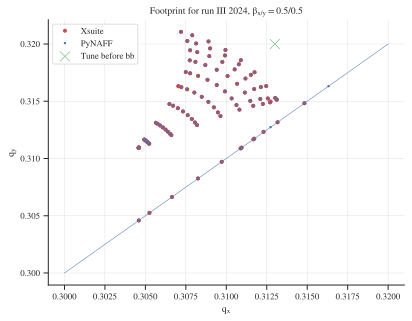

In [86]:
# Define study
STUDY_NAME = "tune_scan_2024"
COLLIDER = "collider_00"
JOB = "xtrack_0215"
TITLE_STUDY = 'run III 2024'
INITIAL_TUNE = (0.313, 0.320)
INITIAL_BETA = (0.5, 0.5)
COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/{JOB}/collider.json"


# Load collider
collider = xt.Multiline.from_json(COLLIDER_PATH)
collider.build_trackers()

# Compute footprint
fp = collider["lhcb1"].get_footprint(
    nemitt_x=2.2e-6,
    nemitt_y=2.2e-6,
    n_turns=2000,
    #linear_rescale_on_knobs=[xt.LinearRescale(knob_name="beambeam_scale", v0=0.0, dv=0.1)],
    freeze_longitudinal=True,
)

# Postprocess footprint
signal = fp.mon.x[-10,:]
signal = fp.mon.y[-10,:]
qx_pynaff = []
qy_pynaff = []
(my_len,_) = np.shape(fp.mon.x)
for ii in range(my_len):   
    signal = fp.mon.x[ii,:]
    qx_pynaff.append(pnf.naff(signal, fp.n_turns, 1, 0 , False)[0][1])
    signal = fp.mon.y[ii,:]
    qy_pynaff.append(pnf.naff(signal, fp.n_turns, 1, 0 , False)[0][1])
    
# Plot footprint
fp.plot(color='r',linewidth=0, marker='o', markersize=3, label='Xsuite')
plt.plot(qx_pynaff, qy_pynaff,'.',color='b', markersize=3, label='PyNAFF')
plt.plot([.3,.32],[.3,.32],'-')
plt.scatter(INITIAL_TUNE[0], INITIAL_TUNE[1], marker='x', color='g', s=100, label='Tune before bb')
plt.title(f'Footprint for {TITLE_STUDY}, ' + r'$\beta_{x/y} =$' + f'{INITIAL_BETA[0]}/{INITIAL_BETA[1]}')
plt.legend()
plt.grid()
plt.show()

### Collider 2024, 0.5/0.15

Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Compiling ContextCpu kernels...


b09f832af3f548f6bcf5f06e8dc5b2b3.c:4389: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from b09f832af3f548f6bcf5f06e8dc5b2b3.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


a5a0bb8fae254595920e747500ff7880.c:4389: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from a5a0bb8fae254595920e747500ff7880.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


8abf574587ab4d26ac33f2f5db38d9a7.c:4394: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from 8abf574587ab4d26ac33f2f5db38d9a7.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 


Done compiling ContextCpu kernels.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.


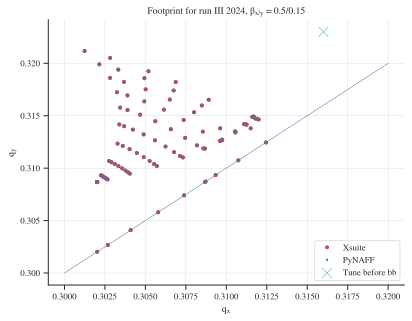

In [87]:
# Define study
STUDY_NAME = "tune_scan_2024"
COLLIDER = "collider_01"
JOB = "xtrack_0293"
TITLE_STUDY = 'run III 2024'
INITIAL_TUNE = (0.316, 0.323)
INITIAL_BETA = (0.5, 0.15)
COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/{JOB}/collider.json"


# Load collider
collider = xt.Multiline.from_json(COLLIDER_PATH)
collider.build_trackers()

# Compute footprint
fp = collider["lhcb1"].get_footprint(
    nemitt_x=2.2e-6,
    nemitt_y=2.2e-6,
    n_turns=2000,
    #linear_rescale_on_knobs=[xt.LinearRescale(knob_name="beambeam_scale", v0=0.0, dv=0.1)],
    freeze_longitudinal=True,
)

# Postprocess footprint
signal = fp.mon.x[-10,:]
signal = fp.mon.y[-10,:]
qx_pynaff = []
qy_pynaff = []
(my_len,_) = np.shape(fp.mon.x)
for ii in range(my_len):   
    signal = fp.mon.x[ii,:]
    qx_pynaff.append(pnf.naff(signal, fp.n_turns, 1, 0 , False)[0][1])
    signal = fp.mon.y[ii,:]
    qy_pynaff.append(pnf.naff(signal, fp.n_turns, 1, 0 , False)[0][1])
    
# Plot footprint
fp.plot(color='r',linewidth=0, marker='o', markersize=3, label='Xsuite')
plt.plot(qx_pynaff, qy_pynaff,'.',color='b', markersize=3, label='PyNAFF')
plt.plot([.3,.32],[.3,.32],'-')
plt.scatter(INITIAL_TUNE[0], INITIAL_TUNE[1], marker='x', color='g', s=100, label='Tune before bb')
plt.title(f'Footprint for {TITLE_STUDY}, ' + r'$\beta_{x/y} =$' + f'{INITIAL_BETA[0]}/{INITIAL_BETA[1]}')
plt.legend()
plt.grid()
plt.show()